In [41]:
import pandas as pd
import numpy as np

In [42]:
data = pd.read_csv("delivery_time.csv")

In [43]:
df = data.copy()


In [44]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Lets understand the data first

In [45]:
df.shape

(21, 2)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [47]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [48]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Lets Plot the data

In [49]:
import matplotlib.pyplot as plt

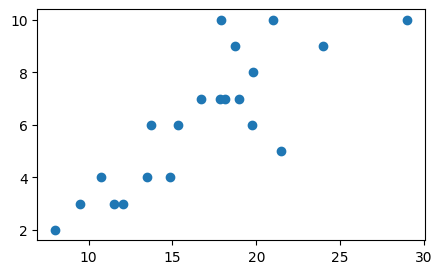

In [50]:
plt.figure(figsize=[5,3])
plt.scatter(df["Delivery Time"],df["Sorting Time"])
plt.show()

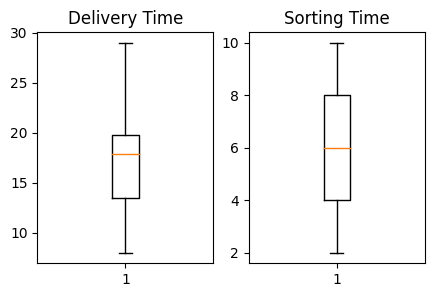

In [51]:
plt.figure(figsize=[5,3])
plt.subplot(121)
plt.boxplot(df["Delivery Time"])
plt.title("Delivery Time")
plt.subplot(122)
plt.boxplot(df["Sorting Time"])
plt.title("Sorting Time")
plt.show()

From the data there's no outliers as such

### Lets check for Correlation

In [52]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [53]:
from scipy.stats import pearsonr 

In [54]:
pearsonr(df["Delivery Time"],df["Sorting Time"])

PearsonRResult(statistic=0.8259972607955327, pvalue=3.983049566687755e-06)

### Lets Visualize the correlation

In [55]:
import seaborn as sns

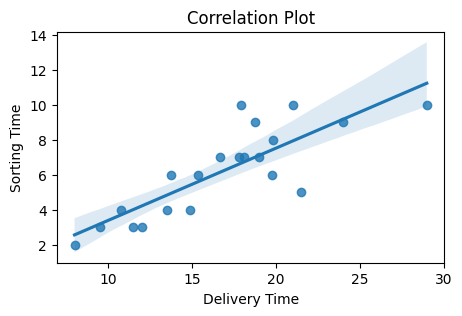

In [56]:
plt.figure(figsize=[5,3])
sns.regplot(x = "Delivery Time", y="Sorting Time", data = df)
plt.title("Correlation Plot")
plt.show()

There is a positive correlation with it being significant as the pearsonr funciton suggests

### Lets try transformations on the data to check for better results

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


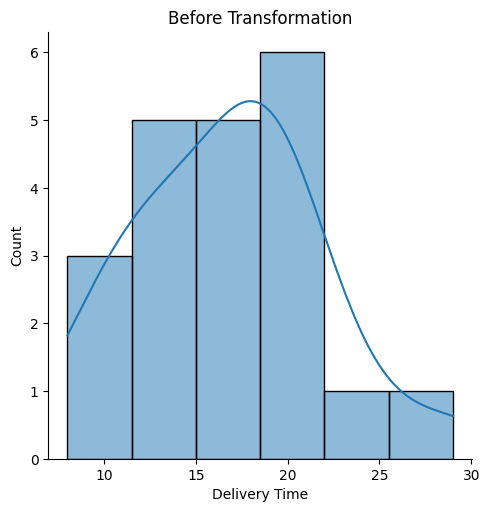

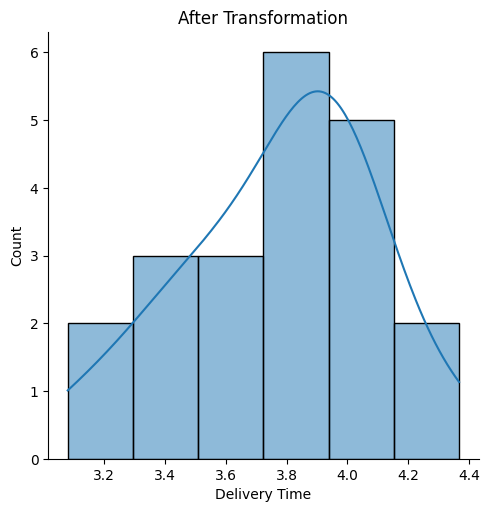

In [57]:
sns.displot(df["Delivery Time"], kde = True)
plt.title("Before Transformation")

sns.displot(np.log(df["Delivery Time"]+1), kde = True)
plt.title("After Transformation")

plt.show()


/tmp/ipykernel_239192/3259360828.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Delivery Time"], kde = True)
/tmp/ipykernel_239192/3259360828.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df["Delivery Time"]+1),kde = True)


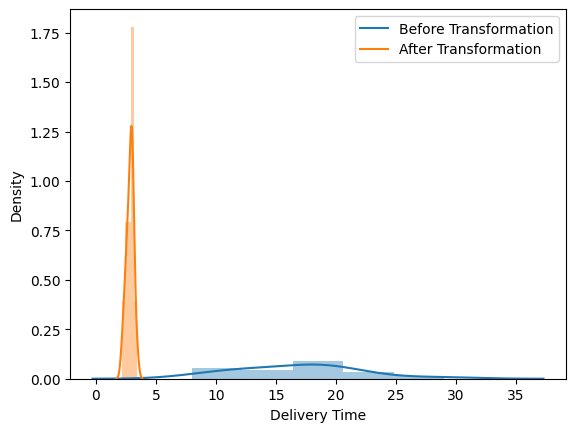

In [58]:
labels = ["Before Transformation", "After Transformation"]

sns.distplot(df["Delivery Time"], kde = True)
sns.distplot(np.log(df["Delivery Time"]+1),kde = True)
plt.legend(labels)
plt.show()

Log Transformation does transform the data into a bell curve or normal distm

Lets check the same for sorting time

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


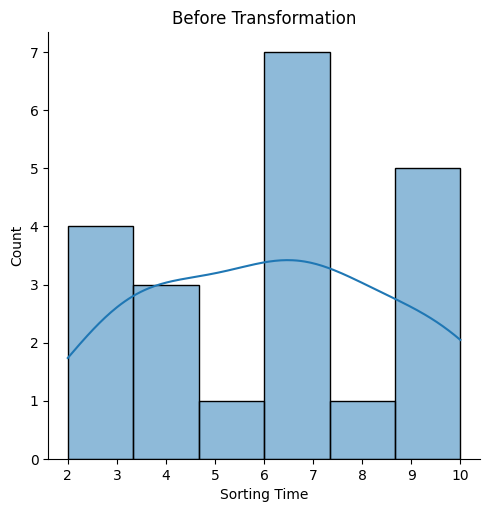

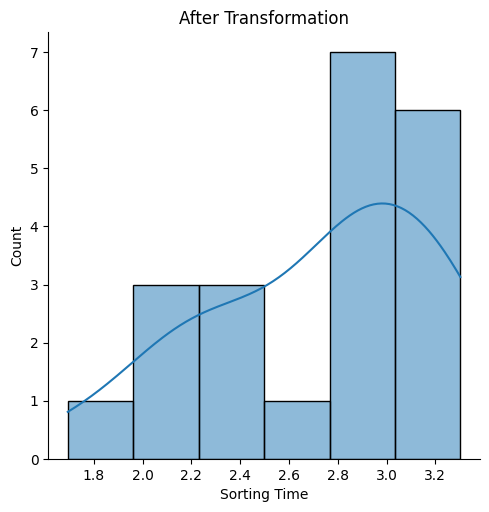

In [59]:
sns.displot(df["Sorting Time"], kde = True)
plt.title("Before Transformation")

sns.displot(np.log(df["Sorting Time"]+1), kde = True)
plt.title("After Transformation")

plt.show()


/tmp/ipykernel_239192/118943887.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Sorting Time"], kde = True, color="g")
/tmp/ipykernel_239192/118943887.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df["Sorting Time"]+1),kde = True)


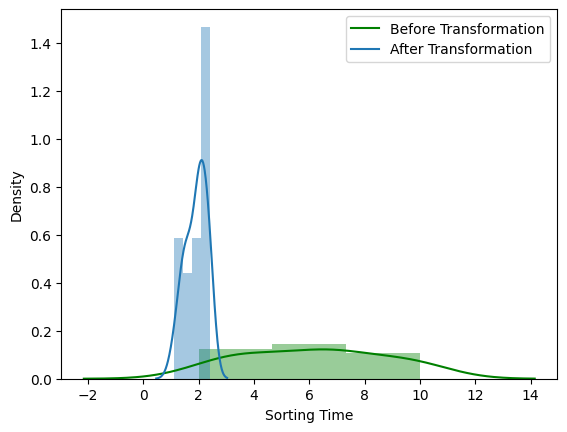

In [60]:
labels = ["Before Transformation", "After Transformation"]

sns.distplot(df["Sorting Time"], kde = True, color="g")
sns.distplot(np.log(df["Sorting Time"]+1),kde = True)
plt.legend(labels)
plt.show()

In [61]:
y = df.iloc[:,:-1]

In [62]:
y

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [63]:
x = df.iloc[:,-1:]

In [64]:
x

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


### Lets fit the model without any transformation and check for the r2 score

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
y_pred = lr.predict(x_test)

In [69]:
test = pd.DataFrame({"predicted":np.array(y_pred).reshape(-1),"actuals":np.array(y_test).reshape(-1)})

In [70]:
test

,predicted,actuals
0,24.924743,21.00
1,18.852010,18.11
2,12.779276,14.88
3,12.779276,13.50
4,24.924743,17.90


In [71]:
from sklearn.metrics import r2_score

In [72]:
print(r2_score(y_test,y_pred))

-1.020759958636741


### Lets check for Homoscedasticity or Hetroscedasticity

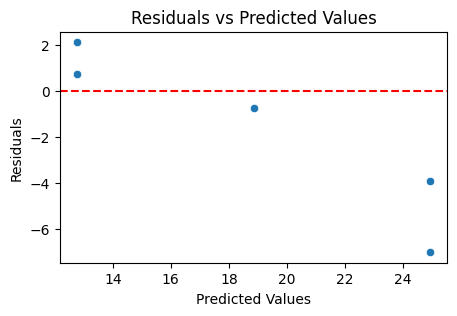

In [73]:
residuals = y_test - y_pred
# residuals

# Plot residuals against predicted values
plt.figure(figsize=(5,3))
sns.scatterplot(x=np.array(y_pred).reshape(-1), y=np.array(residuals).reshape(-1))
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Lets use different transformations and check for the same thing

In [74]:
y = df.iloc[:,:-1]
x = df.iloc[:,-1:]

In [75]:
x = np.log(x)+1
x

,Sorting Time
0,3.302585
1,2.386294
2,2.791759
3,3.197225
4,3.302585
5,2.791759
6,2.945910
7,2.098612
8,3.302585
9,3.197225


In [76]:
y

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [78]:
lr.fit(x_train,y_train)


LinearRegression()

In [79]:
y_pred = lr.predict(x_test)

In [80]:
pd.DataFrame({"a":np.array(y_pred).reshape(-1),"b":np.array(y_test).reshape(-1)})

,a,b
0,22.927130,21.00
1,19.326312,18.11
2,13.676702,14.88
3,13.676702,13.50
4,22.927130,17.90


In [81]:
r2_score(y_test,y_pred)

0.08089653229737437

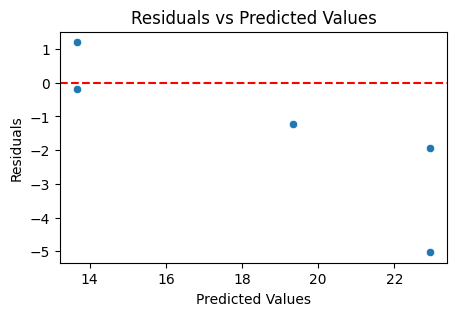

In [82]:
residuals = y_test - y_pred
# residuals

# Plot residuals against predicted values
plt.figure(figsize=(5,3))
sns.scatterplot(x=np.array(y_pred).reshape(-1), y=np.array(residuals).reshape(-1))
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Lets check for cube and sqrt transformation

In [83]:
y = df.iloc[:,:-1]
y

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [84]:
x = np.sqrt(df.iloc[:,-1:])
x

,Sorting Time
0,3.162278
1,2.000000
2,2.449490
3,3.000000
4,3.162278
5,2.449490
6,2.645751
7,1.732051
8,3.162278
9,3.000000


In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [86]:
lr.fit(x_train,y_train)

LinearRegression()

In [87]:
y_pred = lr.predict(x_test)

In [88]:
r2_score(y_test,y_pred)

-0.41870628376893326

### Lets apply cbrt transformation and check the results

In [89]:
y = df.iloc[:,:-1]
x = df.iloc[:,-1:]

In [90]:
y

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [91]:
x = np.cbrt(x)
x

,Sorting Time
0,2.154435
1,1.587401
2,1.817121
3,2.080084
4,2.154435
5,1.817121
6,1.912931
7,1.442250
8,2.154435
9,2.080084


In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [93]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [94]:
r2_score(y_test,y_pred)

-0.23779487062801685

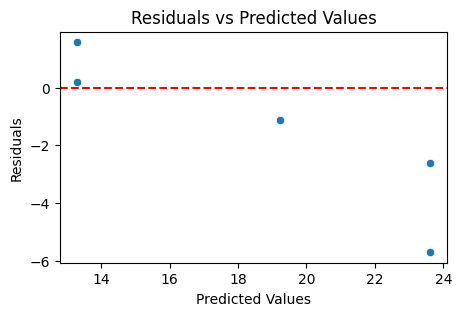

In [95]:
residuals = y_test - y_pred
# residuals

# Plot residuals against predicted values
plt.figure(figsize=(5,3))
sns.scatterplot(x=np.array(y_pred).reshape(-1), y=np.array(residuals).reshape(-1))
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### So the best score we get is using log Transformation